In [1]:
import pickle
import numpy as np 
import random
import symbtools as st
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
from scipy.integrate import odeint
from sklearn.linear_model import Lasso
import pysindy as ps
import sympy as sp





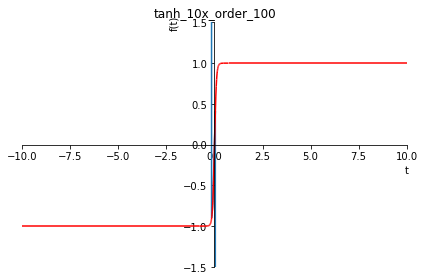

C:\Users\Julius\Documents\Studium_Elektrotechnik\Studienarbeit\Latex\RST-DiplomMasterStud-Arbeit\images/tanh_10x_order_100.png


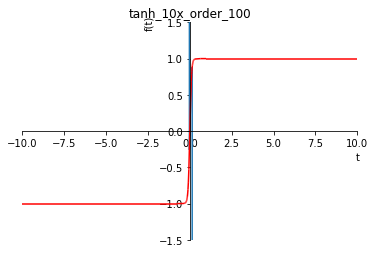

In [108]:
x, t = sp.symbols("x t")
m = 10
order = 100
title ="tanh_" + str(m) + "x_order_" + str(order)
a = st.series(sp.tanh(m*x), x, order)
# a = a.subs(t,0.5*t)
# print(a)
p1 = sp.plot(a, ylim=(-1.5,1.5), show=False, title =title)
p2 = sp.plot(sp.tanh(m*x), show=False, line_color= "red")
p1.append(p2[0])
p1.show()
target = r'C:\Users\Julius\Documents\Studium_Elektrotechnik\Studienarbeit\Latex\RST-DiplomMasterStud-Arbeit\images/' + title + '.png'
print(target)
p1.save(target)


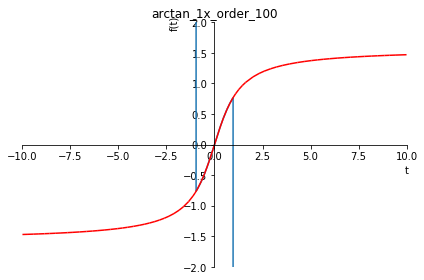

C:\Users\Julius\Documents\Studium_Elektrotechnik\Studienarbeit\Latex\RST-DiplomMasterStud-Arbeit\images/arctan_1x_order_100.png


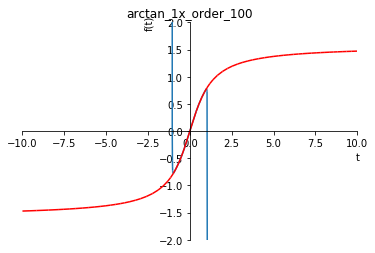

In [106]:
x = sp.symbols("x")
m = 1
order = 100
title ="arctan_" + str(m) + "x_order_" + str(order)
a = st.series(sp.atan(m*x), x, order)
# print(a)
p1 = sp.plot(a, ylim=(-2,2), show=False, title=title)
p2 = sp.plot(sp.atan(m*x), show=False, line_color= "red")
p1.append(p2[0])
p1.show()
target = r'C:\Users\Julius\Documents\Studium_Elektrotechnik\Studienarbeit\Latex\RST-DiplomMasterStud-Arbeit\images/' + title + '.png'
print(target)
p1.save(target)



In [163]:
random.seed(101)
init_state = random.getstate

x= random.uniform(-3,3)
print(x)
x= random.uniform(-3,3)
print(x)
x= random.uniform(-3,3)
print(x)
# random.setstate(init_state)
x= random.uniform(-3,3)
print(x)

0.48691279502738816
-1.8314730267951798
2.7915066423666666
2.543858410060766


In [164]:
-34340570203748.734  + 22318501827713.258  + 12454795168944.426  + -432726792908.844 


0.105224609375

[[-1.         -1.        ]
 [-0.99997519 -1.00999995]
 [-0.99990133 -1.01999967]
 ...
 [ 0.63733888 -4.42048622]
 [ 0.64120801 -4.42228985]
 [ 0.6450776  -4.42407413]]


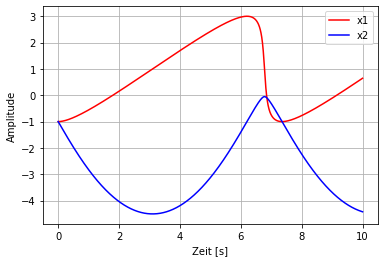

x0' = 1.000 1/x1 + 0.500  + 0.500 
x1' = 1.000 x0 + -0.500  + -0.500 
Model score: 0.977811


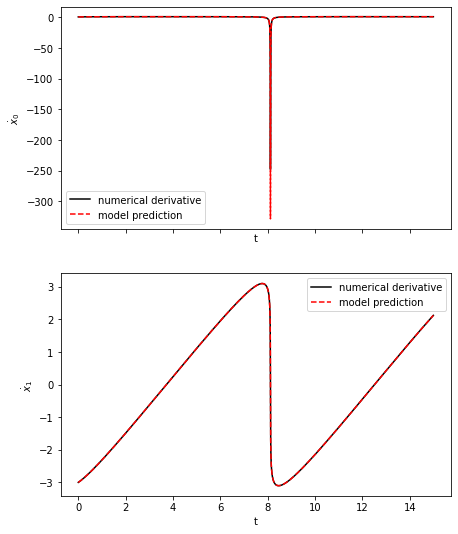

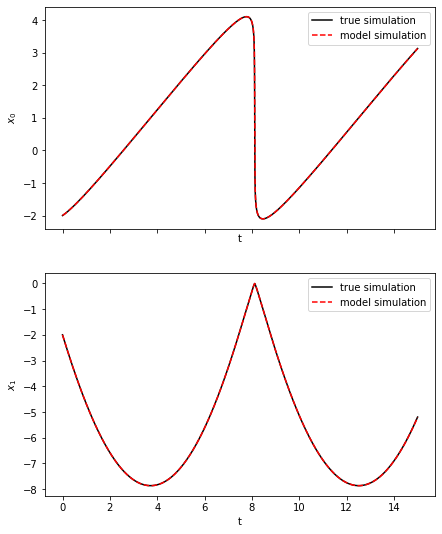

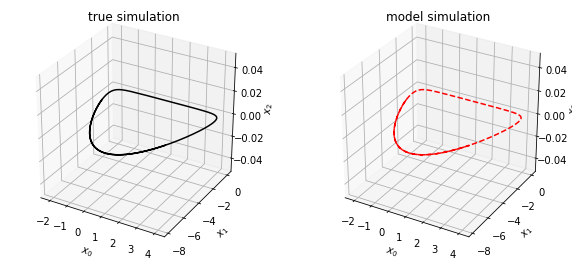

In [165]:
def sys(x, t):
    return [
        1/x[1]+1,
        x[0]-1
    ]
# Generate measurement data
dt = .005
t_train = np.arange(0, 10, dt)
x0_train = [-1, -1]
x_train = odeint(sys, x0_train, t_train)
print(x_train)
## trainingsdaten plotten
plt.plot(t_train, x_train[:,0], color= 'red', label="x1")
plt.plot(t_train, x_train[:,1], color= 'blue', label="x2")
plt.xlabel('Zeit [s]')
plt.ylabel('Amplitude')

plt.grid()
plt.legend()
plt.show()

library_functions = [
    # lambda x : np.exp(x),
    lambda x : 1./x,
    lambda x : x,
    lambda x : 1
    # lambda x,y : np.sin(x+y)
]
library_function_names = [
    # lambda x : 'exp(' + x + ')',
    lambda x : '1/' + x,
    lambda x : x,
    lambda x : ''
    # lambda x,y : 'sin(' + x + ',' + y + ')'
]
custom_library = ps.CustomLibrary(
    library_functions=library_functions, function_names=library_function_names
)

model = ps.SINDy(feature_library=custom_library)
model.fit(x_train, t=dt)
model.print()

# Evolve the sys equations in time using a different initial condition
t_test = np.arange(0, 15, dt)
x0_test = np.array([-2, -2])
x_test = odeint(sys, x0_test, t_test)  

# Compare SINDy-predicted derivatives with finite difference derivatives
print('Model score: %f' % model.score(x_test, t=dt))

# Predict derivatives using the learned model
x_dot_test_predicted = model.predict(x_test)  

# Compute derivatives with a finite difference method, for comparison
x_dot_test_computed = model.differentiate(x_test, t=dt)

fig, axs = plt.subplots(x_test.shape[1], 1, sharex=True, figsize=(7, 9))
for i in range(x_test.shape[1]):
    axs[i].plot(t_test, x_dot_test_computed[:, i],
                'k', label='numerical derivative')
    axs[i].plot(t_test, x_dot_test_predicted[:, i],
                'r--', label='model prediction')
    axs[i].legend()
    axs[i].set(xlabel='t', ylabel='$\dot x_{}$'.format(i))
fig.show()

# Evolve the new initial condition in time with the SINDy model
x_test_sim = model.simulate(x0_test, t_test)

fig, axs = plt.subplots(x_test.shape[1], 1, sharex=True, figsize=(7, 9))
for i in range(x_test.shape[1]):
    axs[i].plot(t_test, x_test[:, i], 'k', label='true simulation')
    axs[i].plot(t_test, x_test_sim[:, i], 'r--', label='model simulation')
    axs[i].legend()
    axs[i].set(xlabel='t', ylabel='$x_{}$'.format(i))

fig = plt.figure(figsize=(10, 4.5))
ax1 = fig.add_subplot(121, projection='3d')
ax1.plot(x_test[:, 0], x_test[:, 1], 'k')
ax1.set(xlabel='$x_0$', ylabel='$x_1$',
        zlabel='$x_2$', title='true simulation')

ax2 = fig.add_subplot(122, projection='3d')
ax2.plot(x_test_sim[:, 0], x_test_sim[:, 1],  'r--')
ax2.set(xlabel='$x_0$', ylabel='$x_1$',
        zlabel='$x_2$', title='model simulation')

fig.show()

In [166]:
library_functions = [
    "1./x",
    "x",
    "sin(x)",
    "cos(x)",
    '1']



print(len(library_functions))
print(library_functions)     
verkettung = True


if verkettung: #Multiplikative Verkettung von Elementarfunktionen bis zu gewünschter Tiefe
    library_functions.pop() # Absolutglied entfernen, später wieder zur Liste hinzufügen
    depth = 2
    lengths = list()
    lengths.append(0)
    original_size=len(library_functions)
    for d in range (0,depth):
        lengths.append(len(library_functions))
        for i in range (0,original_size):
            for k in range (lengths[d],lengths[d+1]):
                library_functions.append(library_functions[i] + '*' + library_functions[k])
        print(len(library_functions))   
        print(library_functions) 
    library_functions.append('1')
       

5
['1./x', 'x', 'sin(x)', 'cos(x)', '1']
20
['1./x', 'x', 'sin(x)', 'cos(x)', '1./x*1./x', '1./x*x', '1./x*sin(x)', '1./x*cos(x)', 'x*1./x', 'x*x', 'x*sin(x)', 'x*cos(x)', 'sin(x)*1./x', 'sin(x)*x', 'sin(x)*sin(x)', 'sin(x)*cos(x)', 'cos(x)*1./x', 'cos(x)*x', 'cos(x)*sin(x)', 'cos(x)*cos(x)']
84
['1./x', 'x', 'sin(x)', 'cos(x)', '1./x*1./x', '1./x*x', '1./x*sin(x)', '1./x*cos(x)', 'x*1./x', 'x*x', 'x*sin(x)', 'x*cos(x)', 'sin(x)*1./x', 'sin(x)*x', 'sin(x)*sin(x)', 'sin(x)*cos(x)', 'cos(x)*1./x', 'cos(x)*x', 'cos(x)*sin(x)', 'cos(x)*cos(x)', '1./x*1./x*1./x', '1./x*1./x*x', '1./x*1./x*sin(x)', '1./x*1./x*cos(x)', '1./x*x*1./x', '1./x*x*x', '1./x*x*sin(x)', '1./x*x*cos(x)', '1./x*sin(x)*1./x', '1./x*sin(x)*x', '1./x*sin(x)*sin(x)', '1./x*sin(x)*cos(x)', '1./x*cos(x)*1./x', '1./x*cos(x)*x', '1./x*cos(x)*sin(x)', '1./x*cos(x)*cos(x)', 'x*1./x*1./x', 'x*1./x*x', 'x*1./x*sin(x)', 'x*1./x*cos(x)', 'x*x*1./x', 'x*x*x', 'x*x*sin(x)', 'x*x*cos(x)', 'x*sin(x)*1./x', 'x*sin(x)*x', 'x*sin(x)*sin(x)

In [167]:
library_functions = [
    lambda x : 1./x,
    lambda x : x,
    lambda x : np.sin(x),
    lambda x : np.cos(x),
    lambda x : 1
  ]


verkettung = True


if verkettung: #Multiplikative Verkettung von Elementarfunktionen bis zu gewünschter Tiefe
    library_functions.pop() # Absolutglied entfernen, später wieder zur Liste hinzufügen
    depth = 2
    lengths = list()
    lengths.append(0)
    original_size=len(library_functions)
    for d in range (0,depth):
        lengths.append(len(library_functions))
        for i in range (0,original_size):
            for k in range (lengths[d],lengths[d+1]):
                if d==0:
                    # print(i,k)
                    library_functions.append(lambda x,y : library_functions[i](x) * library_functions[k](y))
                    # print(d)
                # elif d==1:
              
                #     library_functions.append(lambda x,y,z : library_functions[i](x) * library_functions[k](y,z))
    print(len(library_functions))   
    # print(library_functions) 
    print(library_functions[4](9,1))
    library_functions.append(lambda x : 1)


20


TypeError: <lambda>() missing 1 required positional argument: 'y'

In [199]:
library_function_names = [
    lambda x : '1/' + x,
    lambda x : x,
    lambda x : 'sin(' + x + ')',
    lambda x : 'cos(' + x + ')',
    lambda x : ''     
]
# print(library_function_names)
def factory_1(i,k):
    return lambda x,y : library_function_names[i](x) +'*'+ library_function_names[k](y)
def factory_2(i,k):
    return lambda x,y,z , i=i,k=k: library_function_names[i](x) +'*'+ library_function_names[k](y,z)


if verkettung: #Multiplikative Verkettung von Elementarfunktionen bis zu gewünschter Tiefe
    library_function_names.pop() # Absolutglied entfernen, später wieder zur Liste hinzufügen
    depth = 2
    lengths = list()
    lengths.append(0)
    original_size=len(library_function_names)
    for d in range (0,depth):
        
        lengths.append(len(library_function_names))
        for i in range (0,original_size):
            for k in range (lengths[d],lengths[d+1]):
                if d==0:
                    print(i,k)
                    #func = lambda x,y, i=i,k=k : library_function_names[i](x) +'*'+ library_function_names[k](y)
                    func = factory_1(i,k)
                    library_function_names.append(func)
                    # print(library_function_names[-1]('a','b'))

                elif d==1:
                    # library_function_names.append(lambda x,y,z , i=i,k=k: library_function_names[i](x) +'*'+ library_function_names[k](y,z))
                    func = factory_2(i,k)
                    library_function_names.append(func)
    print(len(library_function_names))   
        # print(library_function_names) 
    # # library_function_names.append(lambda x : '')
    print(len(library_function_names))  
    for a in range (0, 4):
        print(library_function_names[a]('a'))
     
    for a in range (4, 20):
        print(library_function_names[a]('a','b'))

    for a in range (20, 84):
        print(library_function_names[a]('a','b','c'))

0 0
0 1
0 2
0 3
1 0
1 1
1 2
1 3
2 0
2 1
2 2
2 3
3 0
3 1
3 2
3 3
84
84
1/a
a
sin(a)
cos(a)
1/a*1/b
1/a*b
1/a*sin(b)
1/a*cos(b)
a*1/b
a*b
a*sin(b)
a*cos(b)
sin(a)*1/b
sin(a)*b
sin(a)*sin(b)
sin(a)*cos(b)
cos(a)*1/b
cos(a)*b
cos(a)*sin(b)
cos(a)*cos(b)
1/a*1/b*1/c
1/a*1/b*c
1/a*1/b*sin(c)
1/a*1/b*cos(c)
1/a*b*1/c
1/a*b*c
1/a*b*sin(c)
1/a*b*cos(c)
1/a*sin(b)*1/c
1/a*sin(b)*c
1/a*sin(b)*sin(c)
1/a*sin(b)*cos(c)
1/a*cos(b)*1/c
1/a*cos(b)*c
1/a*cos(b)*sin(c)
1/a*cos(b)*cos(c)
a*1/b*1/c
a*1/b*c
a*1/b*sin(c)
a*1/b*cos(c)
a*b*1/c
a*b*c
a*b*sin(c)
a*b*cos(c)
a*sin(b)*1/c
a*sin(b)*c
a*sin(b)*sin(c)
a*sin(b)*cos(c)
a*cos(b)*1/c
a*cos(b)*c
a*cos(b)*sin(c)
a*cos(b)*cos(c)
sin(a)*1/b*1/c
sin(a)*1/b*c
sin(a)*1/b*sin(c)
sin(a)*1/b*cos(c)
sin(a)*b*1/c
sin(a)*b*c
sin(a)*b*sin(c)
sin(a)*b*cos(c)
sin(a)*sin(b)*1/c
sin(a)*sin(b)*c
sin(a)*sin(b)*sin(c)
sin(a)*sin(b)*cos(c)
sin(a)*cos(b)*1/c
sin(a)*cos(b)*c
sin(a)*cos(b)*sin(c)
sin(a)*cos(b)*cos(c)
cos(a)*1/b*1/c
cos(a)*1/b*c
cos(a)*1/b*sin(c)
cos(a)*1/b*cos(c

In [204]:
square_func = lambda x: x**2
function_product = lambda F, m: lambda x: F(x)*m
square_func(2)

function_product(square_func, 3)(2)
f = lambda F: lambda x: 1/F(x)
print(f(square_func)(2))

0.25


In [171]:
xs =[x,y,z]
f = [
    lambda x in range xs : 1
]

SyntaxError: invalid syntax (<ipython-input-171-ba530e490bd1>, line 3)

In [ ]:
import symbtools as st 
st.multi_taylor()

In [172]:


library_functions = [
    lambda x : 1./x,
    lambda x : x,
    lambda x : np.sin(x),
    lambda x : np.cos(x),
    # lambda x, y : x*y,
    lambda x : 1,
    # lambda x : np.sin(x)**2
]
# library_functions.append(lambda x,y : library_functions[3](x)*library_functions[2](y))
# print(library_functions)

print(len(library_functions))

5


In [173]:
import random
import numpy as np
np.random.seed(10)
np.random.uniform(0,1)


0.771320643266746

In [174]:
def u_fun(t):
    return np.column_stack(t)

dt = .002

t_train = np.arange(0, 10, dt)

u_train = u_fun(t_train)
u_tr = np.transpose(u_train)
print(u_tr)

[[0.000e+00]
 [2.000e-03]
 [4.000e-03]
 ...
 [9.994e+00]
 [9.996e+00]
 [9.998e+00]]


In [175]:
eps = 1
random.seed(1)
np.random.normal(scale=eps, size=(1,2))

array([[ 0.03777261, -0.13544849]])

x0' = -9.999 x0 + 9.999 x1 + 1.000 u0^2
x1' = 27.987 x0 + -0.997 x1 + -1.000 x0 x2
x2' = -2.666 x2 + -1.000 u1 + 1.000 x0 x1
Model score: 1.000000


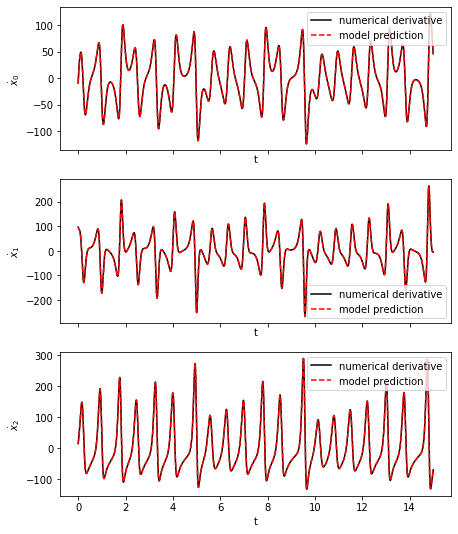

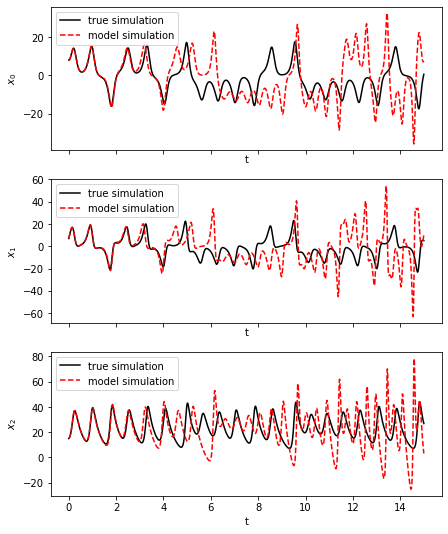

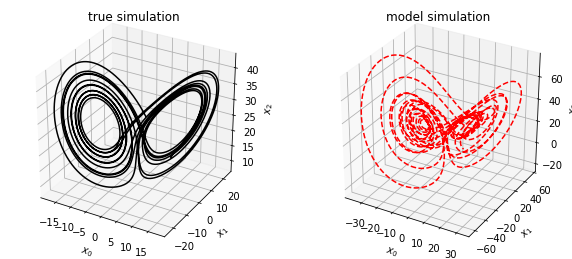

In [176]:
# Control input
def u_fun(t):
    return np.column_stack([np.sin(2 * t), t ** 2])

# Lorenz equations with control input
def lorenz_control(z, t):
    u = u_fun(t)
    return [
        10 * (z[1] - z[0]) + u[0, 0] ** 2,
        z[0] * (28 - z[2]) - z[1],
        z[0] * z[1] - 8 / 3 * z[2] - u[0, 1],
    ]

# Generate measurement data
dt = .002

t_train = np.arange(0, 10, dt)
x0_train = [-8, 8, 27]
x_train = odeint(lorenz_control, x0_train, t_train)
u_train = u_fun(t_train)

# Instantiate and fit the SINDYc model
model = ps.SINDy()
model.fit(x_train, u=u_train, t=dt)
model.print()

# Evolve the Lorenz equations in time using a different initial condition
def u2(t):
    return np.column_stack([np.cos(2 * t), 1/(t+1)])
def lorenz_control_test(z, t):
    u = u2(t)
    return [
        10 * (z[1] - z[0]) + u[0, 0] ** 2,
        z[0] * (28 - z[2]) - z[1],
        z[0] * z[1] - 8 / 3 * z[2] - u[0, 1],
    ]

t_test = np.arange(0, 15, dt)
x0_test = np.array([8, 7, 15])
x_test = odeint(lorenz_control_test, x0_test, t_test)
u_test = u2(t_test)

# Compare SINDy-predicted derivatives with finite difference derivatives
print('Model score: %f' % model.score(x_test, u=u_test, t=dt))

# Predict derivatives using the learned model
x_dot_test_predicted = model.predict(x_test, u=u_test)

# Compute derivatives with a finite difference method, for comparison
x_dot_test_computed = model.differentiate(x_test, t=dt)

fig, axs = plt.subplots(x_test.shape[1], 1, sharex=True, figsize=(7, 9))
for i in range(x_test.shape[1]):
    axs[i].plot(t_test, x_dot_test_computed[:, i],
                'k', label='numerical derivative')
    axs[i].plot(t_test, x_dot_test_predicted[:, i],
                'r--', label='model prediction')
    axs[i].legend()
    axs[i].set(xlabel='t', ylabel='$\dot x_{}$'.format(i))
fig.show()


# Evolve the new initial condition in time with the SINDy model
x_test_sim = model.simulate(x0_test, t_test, u=u_fun)

fig, axs = plt.subplots(x_test.shape[1], 1, sharex=True, figsize=(7, 9))
for i in range(x_test.shape[1]):
    axs[i].plot(t_test, x_test[:, i], 'k', label='true simulation')
    axs[i].plot(t_test, x_test_sim[:, i], 'r--', label='model simulation')
    axs[i].legend()
    axs[i].set(xlabel='t', ylabel='$x_{}$'.format(i))

fig = plt.figure(figsize=(10, 4.5))
ax1 = fig.add_subplot(121, projection='3d')
ax1.plot(x_test[:, 0], x_test[:, 1], x_test[:, 2], 'k')
ax1.set(xlabel='$x_0$', ylabel='$x_1$',
        zlabel='$x_2$', title='true simulation')

ax2 = fig.add_subplot(122, projection='3d')
ax2.plot(x_test_sim[:, 0], x_test_sim[:, 1], x_test_sim[:, 2], 'r--')
ax2.set(xlabel='$x_0$', ylabel='$x_1$',
        zlabel='$x_2$', title='model simulation')

fig.show()

In [177]:
for i in range(0,20):
    if i==0:
        print(i)

0


In [15]:
from sympy import *
from sympy.plotting import plot3d
m1, m2, s2, g = sp.symbols('m1, m2, s2, g')
t = sp.Symbol('t')
np = 1
nq = 1
n = np + nq
pp = st.symb_vector("p1:{0}".format(np+1))
qq = st.symb_vector("q1:{0}".format(nq+1))
aa = st.symb_vector("a1:{0}".format(nq+1))
ttheta = st.row_stack(pp, qq) ##:T
tthetad = st.time_deriv(ttheta, ttheta) ##:T
tthetadd = st.time_deriv(ttheta, ttheta, order=2) ##:T
st.make_global(ttheta, tthetad)
system_read = pickle.load(open("wagen_pendel_f.p","rb"))



# print("{} \n".format(system_read.f[2] ))


# def f3(p1_,pdot1_):
#     return system_read.f[2].subs([(p1,p1_),(pdot1,pdot1_)])

# f3_taylor = st.simplify(st.multi_taylor( f3(p1, pdot1), [p1, pdot1], [0,0], 5))
# print(f3_taylor)

x0 = [0,0] 

f_taylor = st.multi_taylor_matrix(system_read.f, [p1, pdot1], x0, 7)
# print(f_taylor)
print("done")
g_taylor = st.multi_taylor_matrix(system_read.G, [p1, pdot1], x0, 7)
# print(g_taylor)
print("done")
xx = Matrix([[p1], [q1], [pdot1], [qdot1]])
simmod = st.SimulationModel(f_taylor, g_taylor, xx, model_parameters=system_read.mod_params)
pickle.dump(simmod, open("wagen_pendel_f_taylor.p","wb"))
print("done")

# sp.simplify(f_taylor.subs(system_read.mod_params))

# def f3_taylot_plot(p1_,pdot1_):
#     return f3_taylor.subs([(p1,p1_), (pdot1,pdot1_)])


# test = p1*(-120*g*m1**2*(m1 + m2) + 20*g*m1*p1**2*(m1 + m2)*(m1 + 6*m2) - g*p1**4*(m1 + m2)*(m1**2 + 20*m1*m2 + 40*m2*(m1 + 3*m2)) - 120*m1**2*m2*pdot1**2*s2 + 40*m1*m2*p1**2*pdot1**2*s2*(2*m1 + 3*m2))/(120*m1**3*s2)
# sp.simplify(test.subs(system_read.mod_params))

# p1_min = -1
# p1_max = 1
# pdot1_min = -1
# pdot1_max = 1

# p1 = plot3d(f3(p1, pdot1), (p1, p1_min, p1_max), (pdot1, pdot1_min, pdot1_max))
# p2 = plot3d(f3(p1, pdot1), f3_taylot_plot(p1,q1,pdot1), (p1, p1_min, p1_max), (pdot1, pdot1_min, pdot1_max))
# p3 = plot3d(f3_taylot_plot(p1, pdot1), (p1, p1_min, p1_max), (pdot1, pdot1_min, pdot1_max))






done
done
done


In [9]:
0.000761501844816946*3283.09308



2.5000814371257496

In [38]:
xx = np.linspace(-5, 5, 2000)
yy = np.linspace(-5, 5, 2000)
np.meshgrid(xx,yy)

[array([[-5.       , -4.9949975, -4.989995 , ...,  4.989995 ,  4.9949975,  5.       ],
        [-5.       , -4.9949975, -4.989995 , ...,  4.989995 ,  4.9949975,  5.       ],
        [-5.       , -4.9949975, -4.989995 , ...,  4.989995 ,  4.9949975,  5.       ],
        ...,
        [-5.       , -4.9949975, -4.989995 , ...,  4.989995 ,  4.9949975,  5.       ],
        [-5.       , -4.9949975, -4.989995 , ...,  4.989995 ,  4.9949975,  5.       ],
        [-5.       , -4.9949975, -4.989995 , ...,  4.989995 ,  4.9949975,  5.       ]]),
 array([[-5.       , -5.       , -5.       , ..., -5.       , -5.       , -5.       ],
        [-4.9949975, -4.9949975, -4.9949975, ..., -4.9949975, -4.9949975, -4.9949975],
        [-4.989995 , -4.989995 , -4.989995 , ..., -4.989995 , -4.989995 , -4.989995 ],
        ...,
        [ 4.989995 ,  4.989995 ,  4.989995 , ...,  4.989995 ,  4.989995 ,  4.989995 ],
        [ 4.9949975,  4.9949975,  4.9949975, ...,  4.9949975,  4.9949975,  4.9949975],
        [ 5.   

[[-0.0052475  -0.01939806 -0.01651205 ...  0.00071954 -0.01651205 -0.01939806]
 [-0.01939806 -0.01626204  0.00156902 ...  0.01852793  0.00156902 -0.01626204]
 [-0.01651205  0.00156902  0.01875796 ...  0.02020437  0.01875796  0.00156902]
 ...
 [ 0.00071954  0.01852793  0.02020437 ...  0.00444585  0.02020437  0.01852793]
 [-0.01651205  0.00156902  0.01875796 ...  0.02020437  0.01875796  0.00156902]
 [-0.01939806 -0.01626204  0.00156902 ...  0.01852793  0.00156902 -0.01626204]]


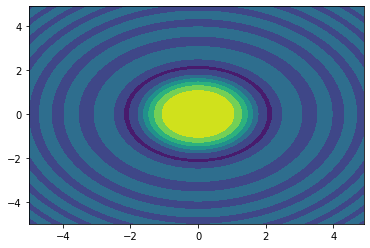

In [46]:
import matplotlib.pyplot as plt
x = np.arange(-5, 5, 0.1)
y = np.arange(-5, 5, 0.1)
xx, yy = np.meshgrid(x, y, sparse=True)
z = np.sin(xx**2 + yy**2) / (xx**2 + yy**2)
print(z)
h = plt.contourf(x,y,z)
plt.show()